In [ ]:
from IPython.display import Image

# Recurrent Neural Networks (RNN)

## Introduction To RNNs

In a recurrent neural network we store the output activations from one or more of the layers of the network. Often these are hidden layer activations. Then, the next time we feed an input example to the network, we include the previously-stored outputs as additional inputs.

In [ ]:
Image(url="https://www.simplilearn.com/ice9/free_resources_article_thumb/Network_framework.gif")

In [ ]:
Image(url="https://cdn-images-1.medium.com/max/1600/1*NKhwsOYNUT5xU7Pyf6Znhg.png", width=1000)

## Backpropagation Through Time

Backpropagation Through Time, or BPTT, is the application of the Backpropagation training algorithm to recurrent neural network applied to sequence data like a time series.

A recurrent neural network is shown one input each timestep and predicts one output.

Conceptually, BPTT works by unrolling all input timesteps. Each timestep has one input timestep, one copy of the network, and one output. Errors are then calculated and accumulated for each timestep. The network is rolled back up and the weights are updated.

In [ ]:
Image(url="https://raw.githubusercontent.com/mmuratarat/mmuratarat.github.io/master/_posts/images/BPTT.png", width=1000, height=500)

Further Resources to understand Backprop Through Time:

https://www.youtube.com/watch?v=Xeb6OjnVn8g&ab_channel=NPTEL-NOCIITM

https://machinelearningmastery.com/gentle-introduction-backpropagation-time/

https://youtu.be/IV8--Y3evjw

## Types of RNN

In [ ]:
Image(url="https://i.stack.imgur.com/6VAOt.jpg")

## Vanishing Gradient Problem

Vanishing gradient problem is a difficulty found in training artificial neural networks with gradient-based learning methods and backpropagation. In such methods, each of the neural network's weights receives an update proportional to the partial derivative of the error function with respect to the current weight in each iteration of training. The problem is that in some cases, the gradient will be vanishingly small, effectively preventing the weight from changing its value. In the worst case, this may completely stop the neural network from further training. As one example of the problem cause, traditional activation functions such as the hyperbolic tangent function have gradients in the range (0, 1), and backpropagation computes gradients by the chain rule. This has the effect of multiplying n of these small numbers to compute gradients of the "front" layers in an n-layer network, meaning that the gradient (error signal) decreases exponentially with n while the front layers train very slowly.

In [ ]:
Image(url='https://cdn-images-1.medium.com/max/1460/1*FWy4STsp8k0M5Yd8LifG_Q.png', width=1100)

# Gated Recurrent Units (GRU)

## Theory

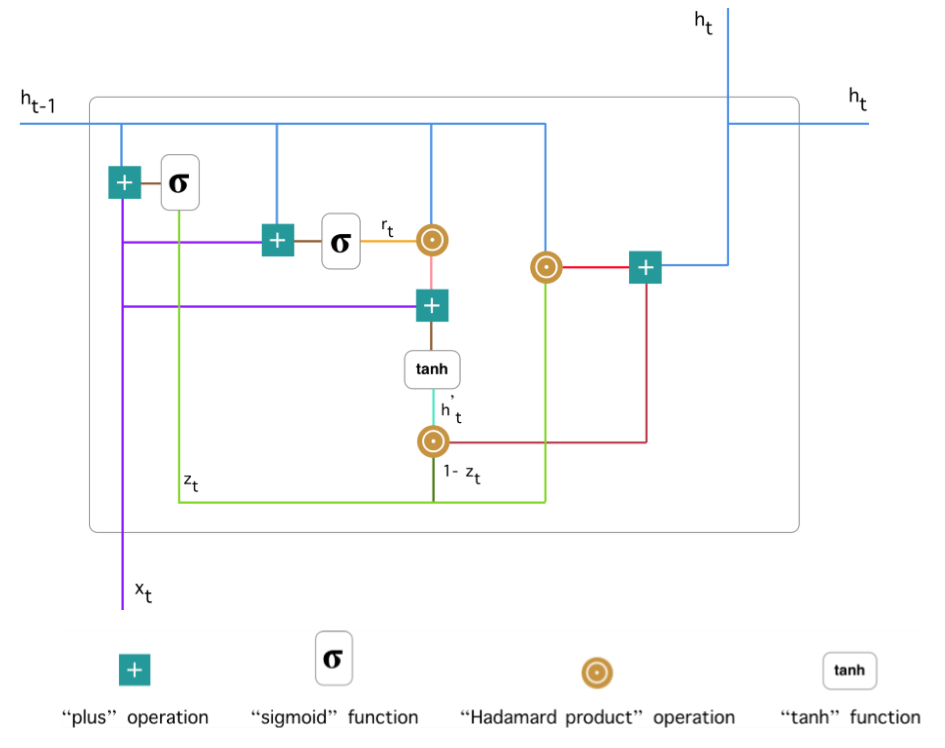

To solve the vanishing gradient problem of a standard RNN, GRU uses, so-called, update gate and reset gate. Basically, these are two vectors which decide what information should be passed to the output. The special thing about them is that they can be trained to keep information from long ago, without washing it through time or remove information which is irrelevant to the prediction.

Gates:

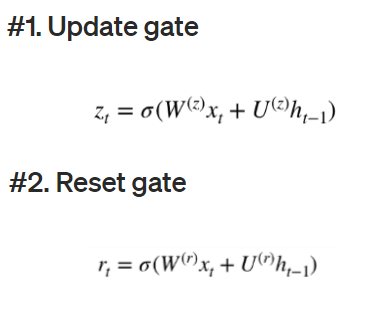

Memory:

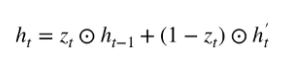

In [ ]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GRU
from tensorflow.keras.optimizers import SGD
import math
from sklearn.metrics import mean_squared_error

In [ ]:
# Some functions to help out with
def plot_predictions(test,predicted):
    plt.plot(test, color='red',label='Real IBM Stock Price')
    plt.plot(predicted, color='blue',label='Predicted IBM Stock Price')
    plt.title('IBM Stock Price Prediction')
    plt.xlabel('Time')
    plt.ylabel('IBM Stock Price')
    plt.legend()
    plt.show()

def return_rmse(test,predicted):
    rmse = math.sqrt(mean_squared_error(test, predicted))
    print("The root mean squared error is {}.".format(rmse))

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataset = pd.read_csv('/content/drive/My Drive/4-1/NNFL TAship/DJIA 30 Stock Time Series/IBM_2006-01-01_to_2018-01-01.csv', index_col='Date', parse_dates=['Date'])
dataset.head()

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,82.45,82.55,80.81,82.06,11715200,IBM
2006-01-04,82.20,82.50,81.33,81.95,9840600,IBM
2006-01-05,81.40,82.90,81.00,82.50,7213500,IBM
2006-01-06,83.95,85.03,83.41,84.95,8197400,IBM
2006-01-09,84.10,84.25,83.38,83.73,6858200,IBM


Dataset Link: https://www.kaggle.com/szrlee/stock-time-series-20050101-to-20171231

In [ ]:
# Checking for missing values
training_set = dataset[:'2016'].iloc[:,1:2].values
test_set = dataset['2017':].iloc[:,1:2].values

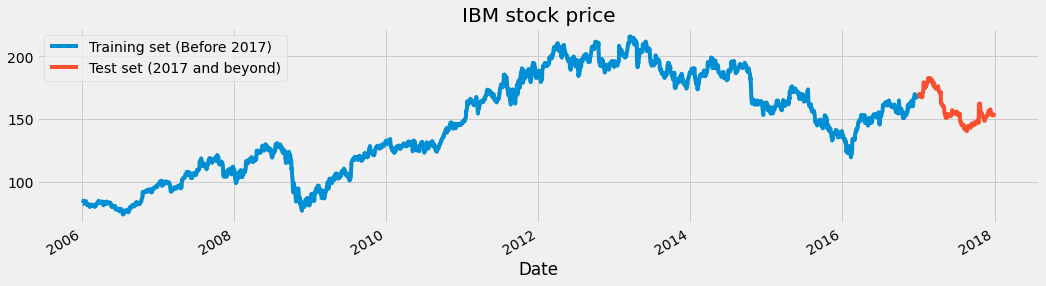

In [ ]:
# We have chosen 'High' attribute for prices. Let's see what it looks like
dataset["High"][:'2016'].plot(figsize=(16,4),legend=True)
dataset["High"]['2017':].plot(figsize=(16,4),legend=True)
plt.legend(['Training set (Before 2017)','Test set (2017 and beyond)'])
plt.title('IBM stock price')
plt.show()

In [ ]:
# Scaling the training set
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

In [ ]:
# Since GRUs store long term memory state, we create a data structure with 60 timesteps and 1 output
# So for each element of training set, we have 60 previous training set elements 
X_train = []
y_train = []
for i in range(60,2769):
    X_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [ ]:
# Reshaping X_train for efficient modelling
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))

In [ ]:
X_train.shape

(2709, 60, 1)

### GRU Model

In [ ]:
# The GRU architecture
regressorGRU = Sequential()
# First GRU layer with Dropout regularisation
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Second GRU layer
regressorGRU.add(GRU(units=50, input_shape=(X_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# The output layer
regressorGRU.add(Dense(units=1))
# Summary
regressorGRU.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 60, 50)            7950      
_________________________________________________________________
dropout (Dropout)            (None, 60, 50)            0         
_________________________________________________________________
gru_1 (GRU)                  (None, 50)                15300     
_________________________________________________________________
dropout_1 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 23,301
Trainable params: 23,301
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compiling the RNN
regressorGRU.compile(optimizer=SGD(lr=0.01, decay=1e-7, momentum=0.9, nesterov=False),loss='mean_squared_error')
# Fitting to the training set
regressorGRU.fit(X_train,y_train,epochs=50,batch_size=150)

Epoch 1/50


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


19/19 [==============================] - 7s 121ms/step - loss: 0.0934
Epoch 2/50
19/19 [==============================] - 2s 119ms/step - loss: 0.0254
Epoch 3/50
19/19 [==============================] - 2s 119ms/step - loss: 0.0069
Epoch 4/50
19/19 [==============================] - 2s 117ms/step - loss: 0.0036
Epoch 5/50
19/19 [==============================] - 2s 118ms/step - loss: 0.0037
Epoch 6/50
19/19 [==============================] - 2s 116ms/step - loss: 0.0036
Epoch 7/50
19/19 [==============================] - 2s 114ms/step - loss: 0.0033
Epoch 8/50
19/19 [==============================] - 2s 115ms/step - loss: 0.0027
Epoch 9/50
19/19 [==============================] - 2s 117ms/step - loss: 0.0029
Epoch 10/50
19/19 [==============================] - 2s 115ms/step - loss: 0.0026
Epoch 11/50
19/19 [==============================] - 2s 115ms/step - loss: 0.0026
Epoch 12/50
19/19 [==============================] - 2s 115ms/step - loss: 0.0025
Epoch 13/50
19/19 [=================

In [ ]:
# Now to get the test set ready in a similar way as the training set.
# The following has been done so forst 60 entires of test set have 60 previous values which is impossible to get unless we take the whole 
# 'High' attribute data for processing
dataset_total = pd.concat((dataset["High"][:'2016'],dataset["High"]['2017':]),axis=0)
inputs = dataset_total[len(dataset_total)-len(test_set) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = sc.transform(inputs)

In [ ]:
# Preparing X_test and predicting the prices
X_test = []
for i in range(60,311):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
GRU_predicted_stock_price = regressorGRU.predict(X_test)
GRU_predicted_stock_price = sc.inverse_transform(GRU_predicted_stock_price)

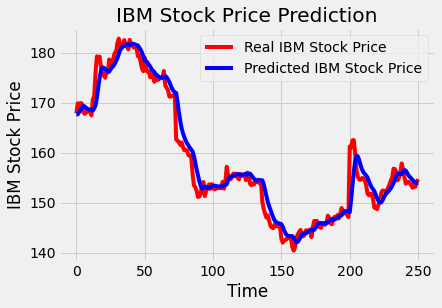

In [ ]:
# Visualizing the results for GRU
plot_predictions(test_set,GRU_predicted_stock_price)

In [ ]:
# Evaluating GRU
return_rmse(test_set,GRU_predicted_stock_price)

The root mean squared error is 2.4311558232563777.


### RNN Model

In [ ]:
model = Sequential()
model.add(SimpleRNN(units=32, input_shape=(X_train.shape[1],1), activation="relu",return_sequences=True))
model.add(Dropout(0.2))

model.add(SimpleRNN(units=32, input_shape=(X_train.shape[1],1), activation="relu"))
model.add(Dropout(0.2))

model.add(Dense(8, activation="relu")) 
model.add(Dense(1))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 60, 32)            1088      
_________________________________________________________________
dropout_6 (Dropout)          (None, 60, 32)            0         
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 32)                2080      
_________________________________________________________________
dropout_7 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 8)                 264       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 9         
Total params: 3,441
Trainable params: 3,441
Non-trainable params: 0
____________________________________________________

In [ ]:
model.compile(optimizer=Adam(lr=0.002),loss='mean_squared_error')

# Fitting to the training set
model.fit(X_train,y_train,epochs=35,batch_size=128)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/35
20/20 [==============================] - 5s 152ms/step - loss: 0.0940
Epoch 2/35
20/20 [==============================] - 3s 150ms/step - loss: 0.0148
Epoch 3/35
20/20 [==============================] - 3s 155ms/step - loss: 0.0082
Epoch 4/35
20/20 [==============================] - 3s 157ms/step - loss: 0.0062
Epoch 5/35
20/20 [==============================] - 3s 159ms/step - loss: 0.0051
Epoch 6/35
20/20 [==============================] - 3s 153ms/step - loss: 0.0043
Epoch 7/35
20/20 [==============================] - 3s 153ms/step - loss: 0.0044
Epoch 8/35
20/20 [==============================] - 3s 150ms/step - loss: 0.0037
Epoch 9/35
20/20 [==============================] - 3s 156ms/step - loss: 0.0037
Epoch 10/35
20/20 [==============================] - 3s 163ms/step - loss: 0.0034
Epoch 11/35
20/20 [==============================] - 3s 152ms/step - loss: 0.0029
Epoch 12/35
20/20 [==============================] - 3s 157ms/step - loss: 0.0030
Epoch 13/35
20/20 [======

In [ ]:
# Now to get the test set ready in a similar way as the training set.
# The following has been done so forst 60 entires of test set have 60 previous values which is impossible to get unless we take the whole 
# 'High' attribute data for processing
dataset_total = pd.concat((dataset["High"][:'2015'],dataset["High"]['2016':]),axis=0)
inputs = dataset_total[len(dataset_total)-len(test_set) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = sc.transform(inputs)

In [ ]:
# Preparing X_test and predicting the prices
X_test = []
for i in range(60,563):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
RNN_predicted_stock_price = model.predict(X_test)
RNN_predicted_stock_price = sc.inverse_transform(RNN_predicted_stock_price)

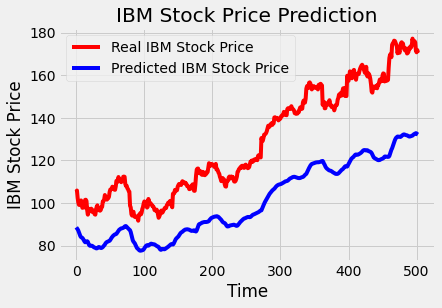

In [ ]:
# Visualizing the results for RNN
plot_predictions(test_set, RNN_predicted_stock_price)

In [ ]:
# Evaluating RNN
return_rmse(test_set,RNN_predicted_stock_price)

The root mean squared error is 28.963463182130308.


While comparing GRU and Simple RNN, the training time for the simpleRNN was noticeably faster as compared to GRU. However, the results obtained by GRU on the test set, were much much better than those by RNNs (can be seen by the graphs or even by the huge difference between the RMSE on test set for the two). It's evident that GRU provides more control and flexibility albeit at the cost of time as it is more complex in it's nature.
